In [35]:
%pip install -r ../requirements.txt
%load_ext autoreload
%autoreload 2

Note: you may need to restart the kernel to use updated packages.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



[notice] A new release of pip available: 22.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
# Import necessary libraries
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add src directory to Python path
src_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'src'))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import custom modules
from preprocessing import load_data, preprocess_data
from plots import (
    plot_histplot, plot_countplot, plot_heatmap, 
    plot_emotional_states_bar, plot_text_wordcloud,
    plot_emotion_distribution, plot_emotion_heatmap,
    plot_confusion_matrix, plot_training_metrics,
    plot_sentiment_distribution, plot_sentiment_emotion_heatmap,
    plot_bert_training_progress, plot_emotion_by_sentiment,
    plot_sentiment_confidence
)
from nlp_sentimentanalysis import NLPipeline, EMOTION_STATES
from config import MODEL_NAMES

sns.set(style='whitegrid')
warnings.filterwarnings("ignore")

In [37]:
# Load the data using the preprocessing module
input_path = '../data/dataset.csv'
df = load_data(input_path)

display("shape:", df.shape)
display("columns:", df.columns)
display(df.head())
display(df.describe())

'shape:'

(110527, 17)

'columns:'

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'PatientNotes', 'PatientSentiment', 'NoShowReason'],
      dtype='object')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,PatientNotes,PatientSentiment,NoShowReason
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Patient has a known history of hypertension. P...,Patient expresses fear and anxiety about high ...,NaN
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,No ongoing chronic conditions noted. General c...,Patient is hopeful and shows no significant an...,NaN
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,No ongoing chronic conditions noted. General c...,Elderly patient expresses fear of declining he...,NaN
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,No ongoing chronic conditions noted. General c...,Patient (minor) is anxious and fearful about m...,NaN
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Patient has a known history of hypertension. P...,Patient experiences stress and anxiety managin...,NaN


,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Pre Processing

In [38]:
df = preprocess_data(df)

# Display the information, first few rows, and descriptive statistics of the DataFrame
display("shape:", df.shape)
display("columns:", df.columns)
display(df.head())
display(df.describe())

[preprocessing] Starting preprocessing...
Initial shape of the dataset: (110527, 17)
Initial columns in the dataset: Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'PatientNotes', 'PatientSentiment', 'NoShowReason'],
      dtype='object')
Dropping unnecessary columns...
Before dropping: Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'PatientNotes', 'PatientSentiment', 'NoShowReason'],
      dtype='object')
Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'PatientNotes', 'Pati

'shape:'

(110527, 21)

'columns:'

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'PatientNotes', 'PatientSentiment',
       'NoShowReason', 'WaitDays', 'anxiety', 'stress', 'confusion', 'hopeful',
       'fear'],
      dtype='object')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,...,No-show,PatientNotes,PatientSentiment,NoShowReason,WaitDays,anxiety,stress,confusion,hopeful,fear
0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,...,0,Patient has a known history of hypertension. P...,Patient expresses fear and anxiety about high ...,NaN,-1,1,1,1,0,1
1,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,...,0,No ongoing chronic conditions noted. General c...,Patient is hopeful and shows no significant an...,NaN,-1,1,1,0,1,1
2,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,...,0,No ongoing chronic conditions noted. General c...,Elderly patient expresses fear of declining he...,NaN,-1,0,1,1,0,1
3,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,...,0,No ongoing chronic conditions noted. General c...,Patient (minor) is anxious and fearful about m...,NaN,-1,0,1,0,0,1
4,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,...,0,Patient has a known history of hypertension. P...,Patient experiences stress and anxiety managin...,NaN,-1,1,1,0,0,1


,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitDays,anxiety,stress,confusion,hopeful,fear
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,9.183702,0.674179,0.936287,0.191564,0.446045,0.980674
std,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.254996,0.468683,0.244242,0.393534,0.497083,0.137667
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis (EDA)

In this section, we perform exploratory data analysis on the patient appointments dataset to understand the data, visualize key features, and derive insights.

## Visualizations

Visualize the distribution of key features and their relationships.

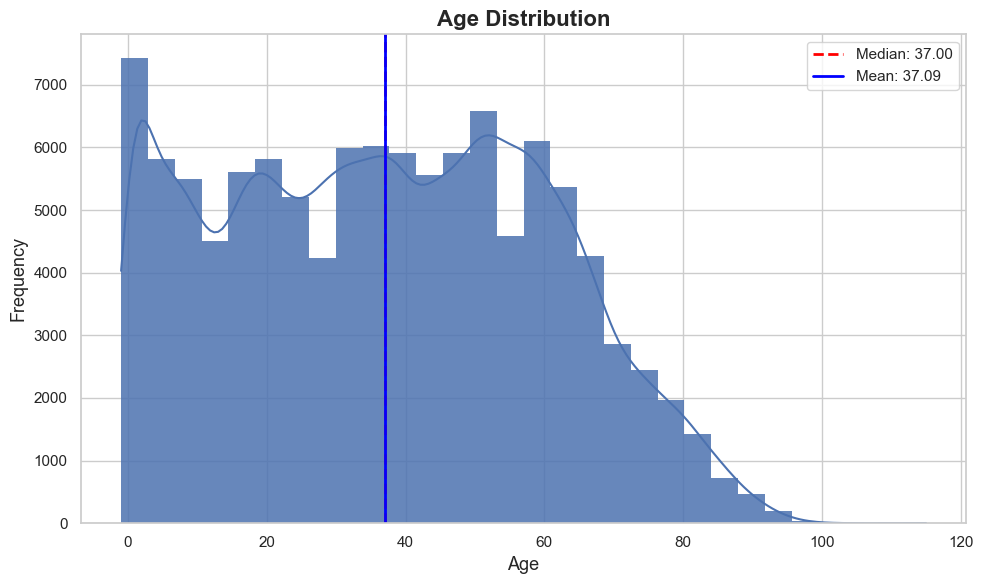

2025-06-08 23:05:49,432 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-08 23:05:49,566 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-08 23:05:49,566 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


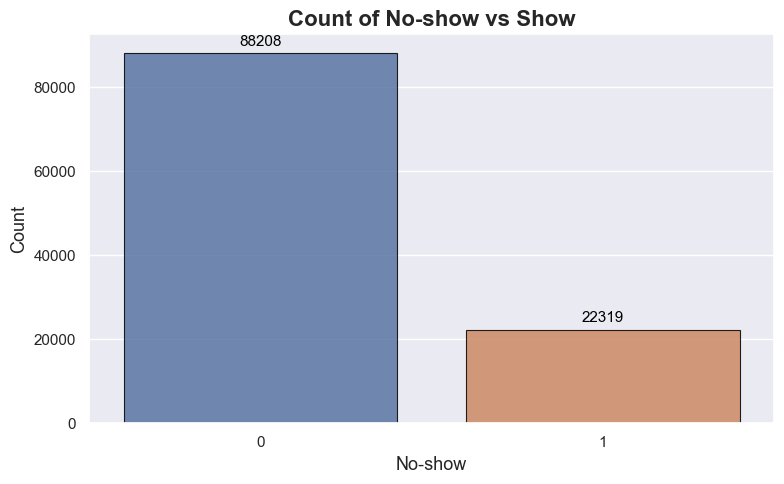

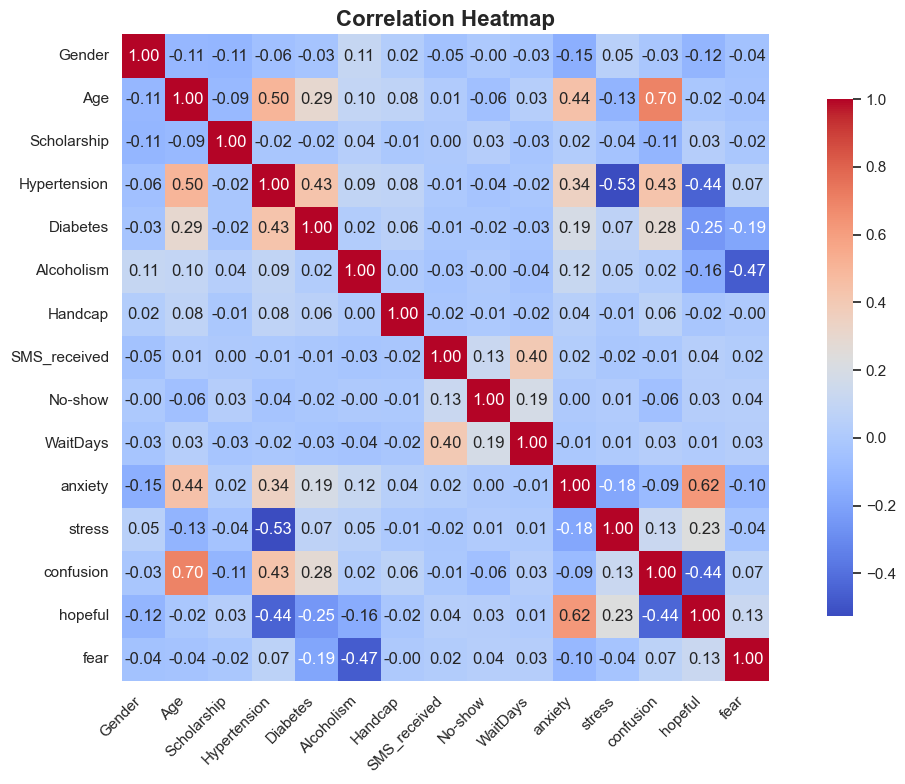

In [39]:
# Distribution of Age
plot_histplot(
    data=df,
    column='Age',
    bins=30,
    kde=True,
    title='Age Distribution',
    xlabel='Age',
    ylabel='Frequency',
    figsize=(10, 6)
)

# Countplot of No-show
plot_countplot(
    data=df,
    column='No-show',
    title='Count of No-show vs Show',
    xlabel='No-show',
    ylabel='Count',
    figsize=(8, 5)
)

# Correlation heatmap
# Only use numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plot_heatmap(
    data=correlation_matrix,
    title='Correlation Heatmap',
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    figsize=(12, 8)
)

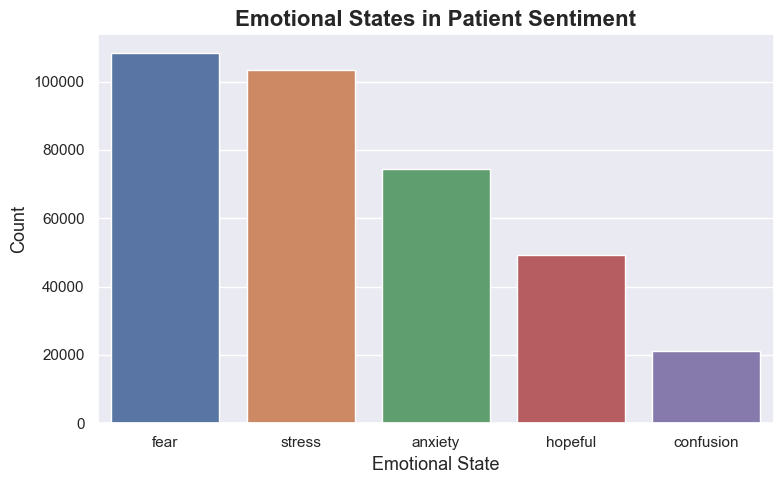

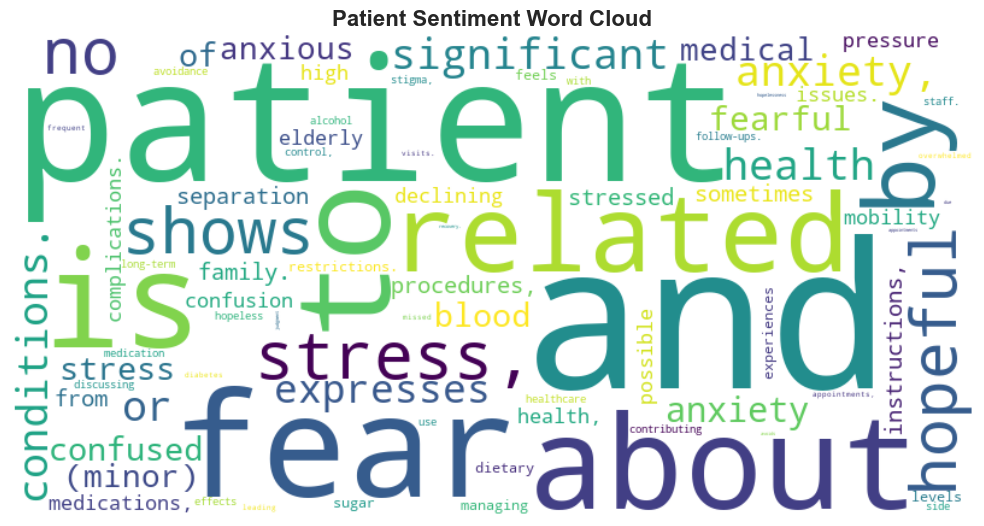

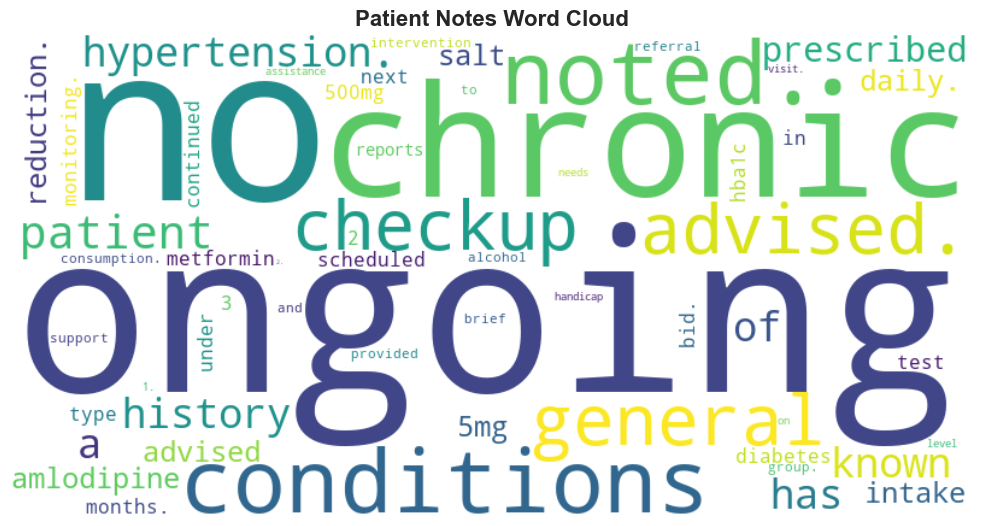

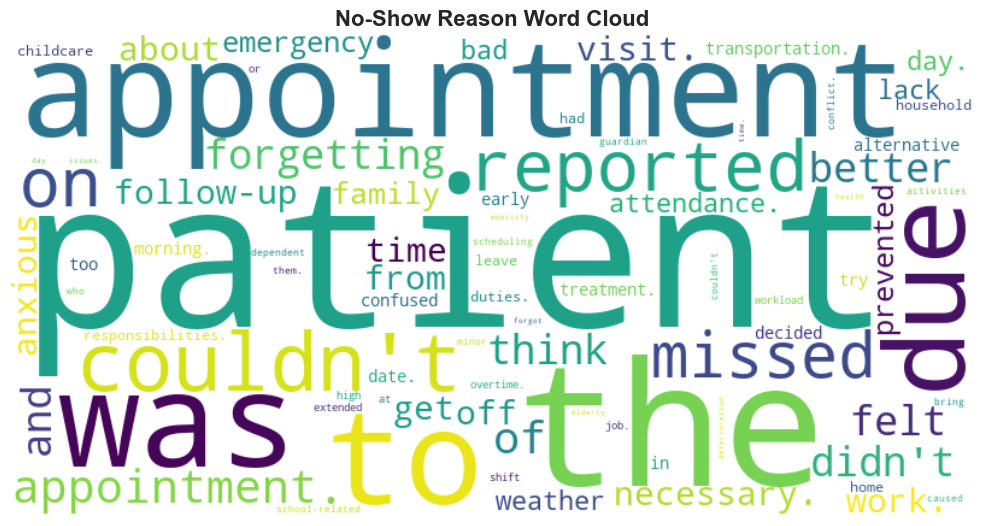

In [40]:
# Plot emotional states as a bar plot
plot_emotional_states_bar(df)

# Plot word clouds for PatientSentiment, PatientNotes, and NoShowReason
plot_text_wordcloud(df['PatientSentiment'], title='Patient Sentiment Word Cloud')
plot_text_wordcloud(df['PatientNotes'], title='Patient Notes Word Cloud')
plot_text_wordcloud(df['NoShowReason'], title='No-Show Reason Word Cloud')

## EDA Conclusion

EDA provided insights into the data, missing values, and feature relationships.

# Supervised Learning for Patient Show/No Show Prediction

Implement supervised learning algorithms to predict patient show/no-show.

# Unsupervised Learning for Patient Clustering

Apply unsupervised learning techniques to cluster patients.

## Unsupervised Learning Conclusion

K-Means and GMM clustering provided insights into patient groupings.

# NLP Analysis on Patient Appointments

Perform NLP analysis on patient notes and sentiments.

## Sentiment Analysis

Perform sentiment analysis on the `PatientSentiment` column using TinyBERT model and extract emotional states. This will help us understand patient feelings and their potential impact on no-show rates.

2025-06-08 23:30:28,127 - nlp_sentimentanalysis - INFO - Using device: cpu
2025-06-08 23:30:28,127 - nlp_sentimentanalysis - INFO - Loading model prajjwal1/bert-tiny with 2 labels...
2025-06-08 23:30:28,127 - nlp_sentimentanalysis - INFO - Loading model prajjwal1/bert-tiny with 2 labels...
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2025-06-08 23:30:28,971 - nlp_sentimentanalysis - INFO - Model loaded successfully on cpu
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2025-06-08 23:30:28,971 - nlp

Loading TinyBERT model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2025-06-08 23:30:29,862 - nlp_sentimentanalysis - INFO - Model loaded successfully on cpu
2025-06-08 23:30:29,874 - nlp_sentimentanalysis - INFO - Predicting sentiment for 110527 texts...
2025-06-08 23:30:29,862 - nlp_sentimentanalysis - INFO - Model loaded successfully on cpu
2025-06-08 23:30:29,874 - nlp_sentimentanalysis - INFO - Predicting sentiment for 110527 texts...


Model loaded successfully!
Performing sentiment and emotion analysis...

Sentiment distribution:
sentiment_label
negative    110527
Name: count, dtype: int64

Dominant emotion distribution:
dominant_emotion
neutral      51247
anxiety      31139
stress       18278
confusion     9486
fear           377
Name: count, dtype: int64

Sentiment distribution:
sentiment_label
negative    110527
Name: count, dtype: int64

Dominant emotion distribution:
dominant_emotion
neutral      51247
anxiety      31139
stress       18278
confusion     9486
fear           377
Name: count, dtype: int64


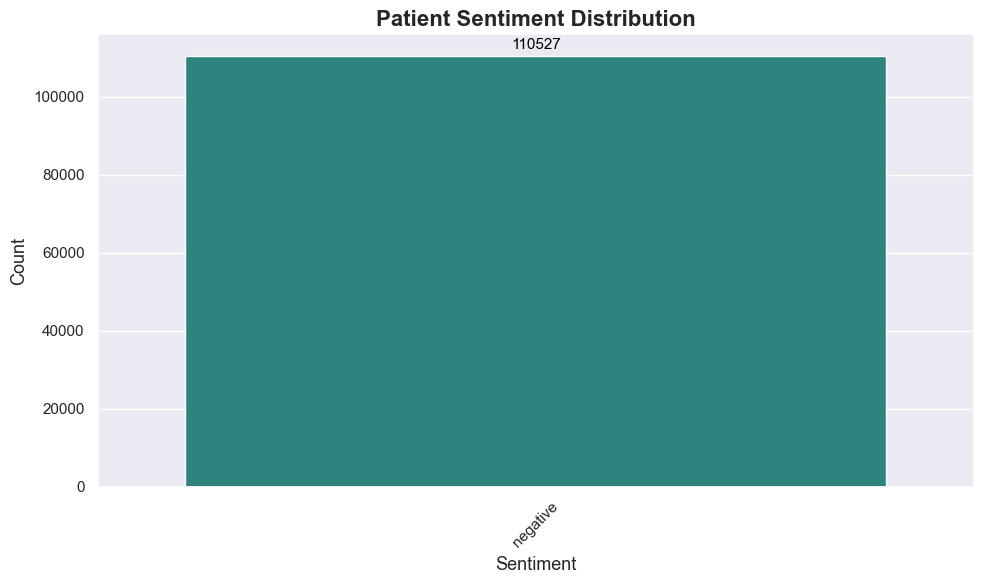

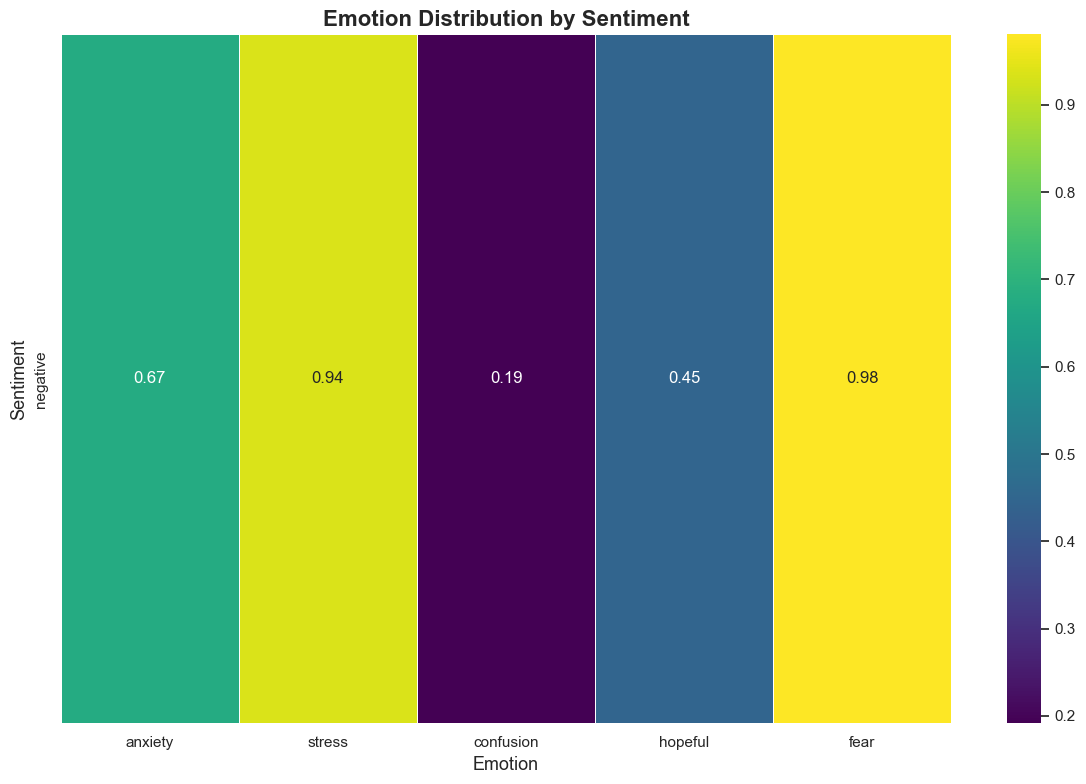

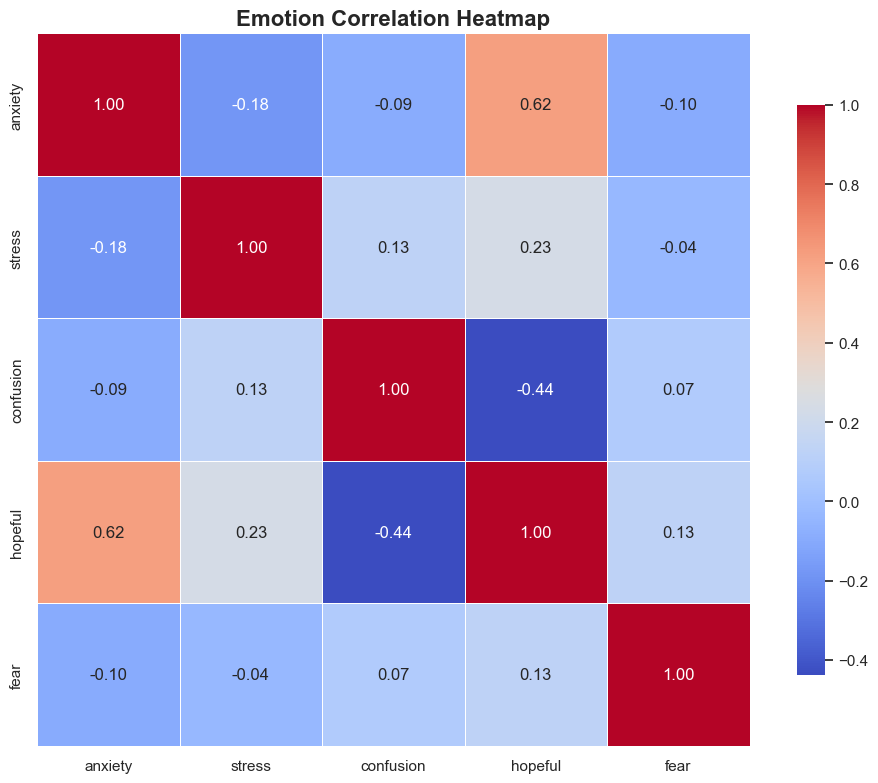

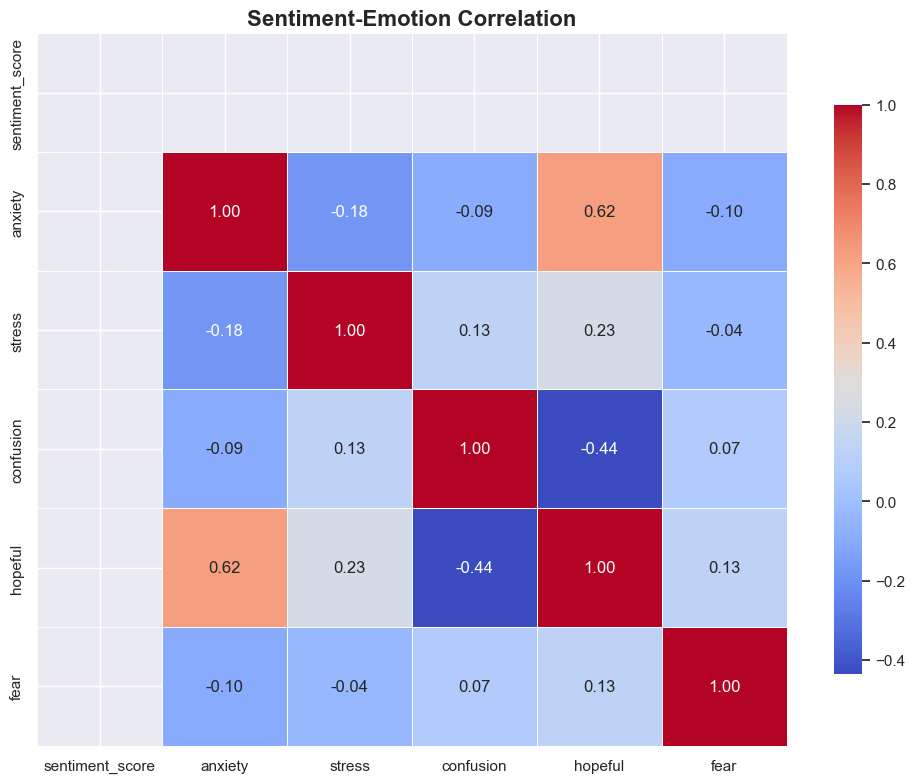

In [42]:
# Initialize the NLP pipeline
nlp = NLPipeline(model_name=MODEL_NAMES['TINY'])

# Load the TinyBERT model
print("Loading TinyBERT model...")
nlp.load_bert_model()
print("Model loaded successfully!")

# Perform comprehensive sentiment and emotion analysis
print("Performing sentiment and emotion analysis...")
sentiment_results = pd.DataFrame(nlp.predict_with_explanation(df['PatientSentiment'].tolist()))

# Add the results to the dataframe
df['sentiment'] = sentiment_results['sentiment']
df['sentiment_label'] = sentiment_results['sentiment']

# Add emotion columns
df['emotions_detected'] = sentiment_results['emotions_detected']
df['dominant_emotion'] = sentiment_results.apply(lambda x: next(iter(x['emotions_detected'])) if x['emotions_detected'] else 'neutral', axis=1)

# Display results
print(f"\nSentiment distribution:\n{df['sentiment_label'].value_counts()}")
print(f"\nDominant emotion distribution:\n{df['dominant_emotion'].value_counts()}")

# Plot sentiment distribution
plot_sentiment_distribution(df, title='Patient Sentiment Distribution')

# Plot emotions by sentiment
plot_emotion_by_sentiment(df, title='Emotion Distribution by Sentiment')

# Plot emotion heatmap
plot_emotion_heatmap(df, emotions=EMOTION_STATES)

# Plot sentiment-emotion heatmap
plot_sentiment_emotion_heatmap(df, emotions=EMOTION_STATES)


Analyzing NoShowReason text...
Optimal number of clusters: 9
Optimal number of clusters: 9

Top terms per cluster:
Cluster 0:
  reported, appointment, patient, forgetting, date, confused, job, workload, high, issues
  Sample reasons: ['Patient reported forgetting the appointment.', 'Patient confused the appointment date.', 'Patient reported high workload at job.']

Cluster 1:
  prevented, emergency, attendance, family, work, treatment, transportation, time, think, shift
  Sample reasons: ['Family emergency prevented attendance.', 'Family emergency prevented attendance.', 'Family emergency prevented attendance.']

Cluster 2:
  think, necessary, didn, follow, felt, better, patient, transportation, time, try
  Sample reasons: ["Patient felt better and didn't think follow-up was necessary.", "Patient felt better and didn't think follow-up was necessary.", "Patient felt better and didn't think follow-up was necessary."]

Cluster 3:
  try, treatment, alternative, decided, patient, visit, tr

2025-06-08 23:45:57,542 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-08 23:45:57,647 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-08 23:45:57,647 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


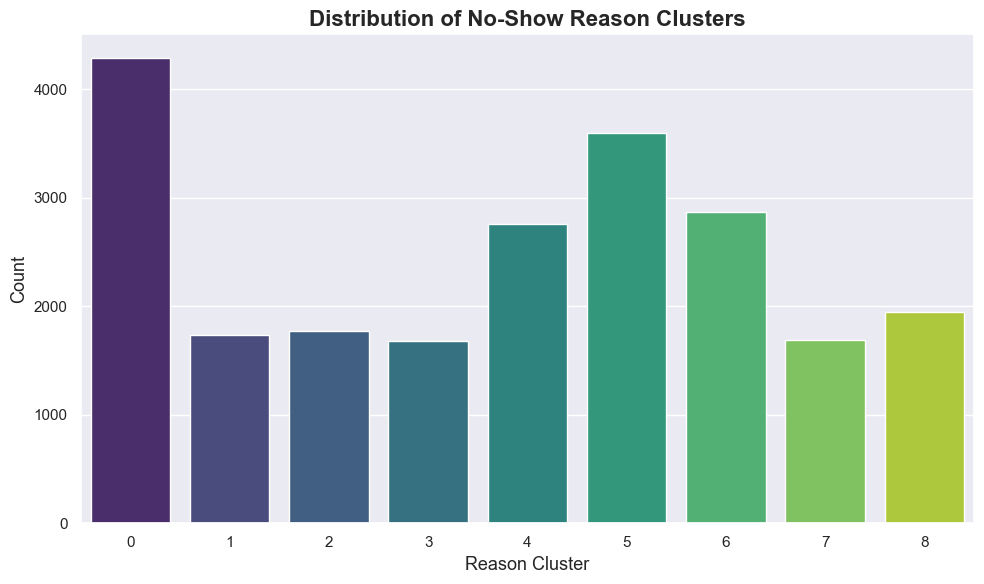

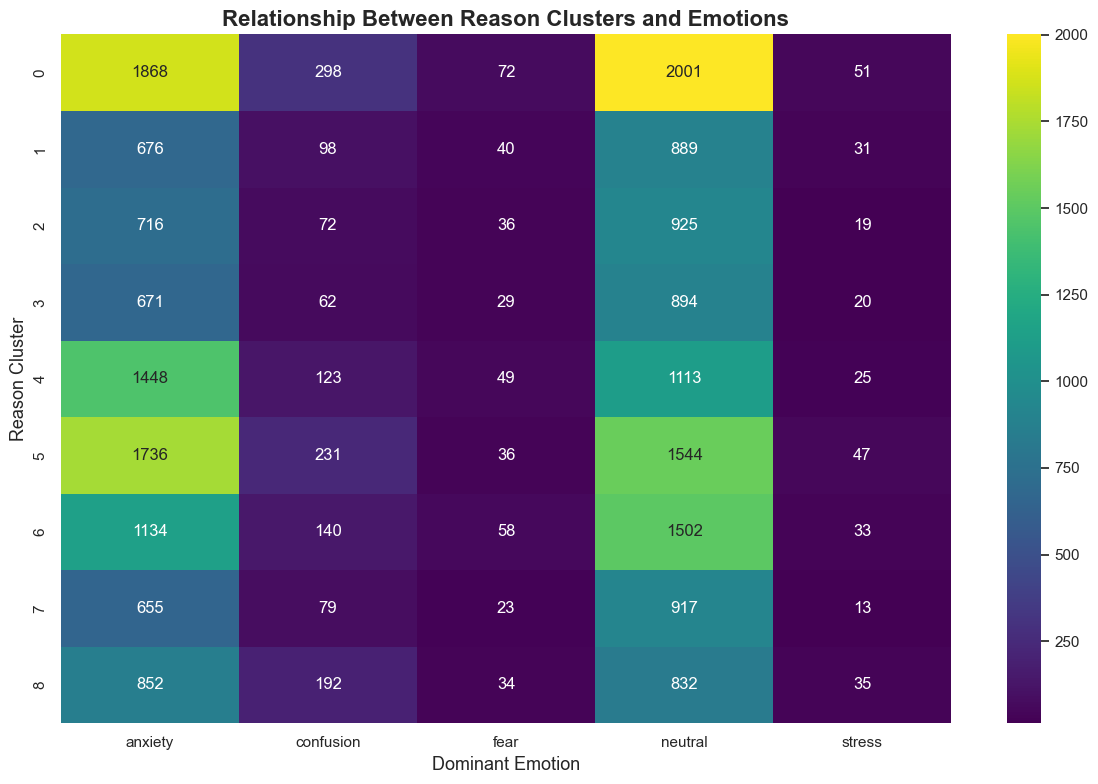

In [44]:
# Analyze NoShowReason using NLP techniques
print("\nAnalyzing NoShowReason text...")

# Filter to just the no-show patients
noshow_df = df[df['No-show'] == 1].copy()

# Group similar reasons
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    max_features=100, 
    stop_words='english',
    min_df=2
)

# Filter out rows with empty NoShowReason
noshow_df = noshow_df[noshow_df['NoShowReason'].notna() & (noshow_df['NoShowReason'] != '')]

# Vectorize the text
tfidf_matrix = vectorizer.fit_transform(noshow_df['NoShowReason'])

# Determine optimal number of clusters
from sklearn.metrics import silhouette_score
silhouette_scores = []
k_range = range(2, min(10, len(noshow_df)))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    if len(set(cluster_labels)) > 1:  # Ensure we have at least 2 clusters
        silhouette_scores.append(silhouette_score(tfidf_matrix, cluster_labels))
    else:
        silhouette_scores.append(0)

# Find optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Cluster the NoShowReason
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
noshow_df['reason_cluster'] = kmeans.fit_predict(tfidf_matrix)

# Get the top terms for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("\nTop terms per cluster:")
for i in range(optimal_k):
    print(f"Cluster {i}:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"  {', '.join(top_terms)}")
    print(f"  Sample reasons: {noshow_df[noshow_df['reason_cluster'] == i]['NoShowReason'].sample(min(3, sum(noshow_df['reason_cluster'] == i))).tolist()}")
    print()

# Plot the distribution of reason clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='reason_cluster', data=noshow_df, palette='viridis')
plt.title('Distribution of No-Show Reason Clusters', fontsize=16, fontweight='bold')
plt.xlabel('Reason Cluster', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.tight_layout()
plt.show()

# Analyze the relationship between reason clusters and dominant emotions
reason_emotion_counts = pd.crosstab(noshow_df['reason_cluster'], noshow_df['dominant_emotion'])

# Plot as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(reason_emotion_counts, cmap='viridis', annot=True, fmt='d')
plt.title('Relationship Between Reason Clusters and Emotions', fontsize=16, fontweight='bold')
plt.xlabel('Dominant Emotion', fontsize=13)
plt.ylabel('Reason Cluster', fontsize=13)
plt.tight_layout()
plt.show()

In [ ]:
# Train a sentiment classifier using TinyBERT
print("\nTraining a sentiment classifier on our data...")

# Create training labels based on sentiment polarity
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader

# Define a custom dataset for text data
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer(
            text,
            truncation=True,
            max_length=self.max_length,
            padding='max_length',
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Get texts and labels
texts = df['PatientSentiment'].tolist()
labels = df['sentiment'].tolist()

# First split into train+val and test sets
train_val_texts, test_texts, train_val_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# Then split train+val into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_val_texts, train_val_labels, test_size=0.1, random_state=42, stratify=train_val_labels
)

# Create a new NLP pipeline for training (to avoid affecting the previous one)
train_nlp = NLPipeline(model_name=MODEL_NAMES['TINY'])
train_nlp.load_bert_model()

# Create datasets
train_dataset = TextDataset(train_texts, train_labels, train_nlp.tokenizer)
val_dataset = TextDataset(val_texts, val_labels, train_nlp.tokenizer)
test_dataset = TextDataset(test_texts, test_labels, train_nlp.tokenizer)

# Create dataloaders
train_dl = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dl = DataLoader(val_dataset, batch_size=16)
test_dl = DataLoader(test_dataset, batch_size=16)

# Train the model (use fewer epochs for demonstration)
training_stats = train_nlp.train_bert(train_dl, val_dl, epochs=2, learning_rate=5e-5)

# Evaluate on test set
test_metrics = train_nlp.evaluate_bert(test_dl)
print(f"\nTest set evaluation:")
print(f"Accuracy: {test_metrics['accuracy']:.4f}")
print(f"F1 Score: {test_metrics['f1']:.4f}")

# Plot training progress
plot_bert_training_progress(training_stats)

# Plot confusion matrix
if 'confusion_matrix' in test_metrics:
    plot_confusion_matrix(
        test_metrics['confusion_matrix'],
        classes=['Negative', 'Positive'],
        title='Sentiment Classification Confusion Matrix'
    )
    
# Save the trained model
model_path = '../models/nlp/sentiment_classifier'
os.makedirs(os.path.dirname(model_path), exist_ok=True)
train_nlp.save_model(model_path)
print(f"\nModel saved to {model_path}")


Training a sentiment classifier on our data...


2025-06-08 23:48:28,433 - nlp_sentimentanalysis - INFO - Using device: cpu
2025-06-08 23:48:28,446 - nlp_sentimentanalysis - INFO - Loading model prajjwal1/bert-tiny with 2 labels...
2025-06-08 23:48:28,446 - nlp_sentimentanalysis - INFO - Loading model prajjwal1/bert-tiny with 2 labels...
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2025-06-08 23:48:28,921 - nlp_sentimentanalysis - INFO - Model loaded successfully on cpu
2025-06-08 23:48:28,927 - nlp_sentimentanalysis - INFO - Loading model prajjwal1/bert-tiny with 2 labels...
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this m

AttributeError: 'NLPipeline' object has no attribute 'create_dataloaders'

In [ ]:
# Save the trained model
model_path = '../models/nlp/sentiment_classifier'
os.makedirs(os.path.dirname(model_path), exist_ok=True)
train_nlp.save_model(model_path)
print(f"\nModel saved to {model_path}")

## No-Show Reason Analysis

Analyze reasons for no-shows using NLP techniques. We'll use our TinyBERT model to classify the no-show reasons and identify patterns that might help predict future no-shows.

In [ ]:
# # Topic Modeling using TF-IDF and Logistic Regression
# tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# X = tfidf_vectorizer.fit_transform(data['NoShowReason'])
# y = data['No-show']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# Filter the data to only include no-show cases
no_show_data = df[df['No-show'] == 1].copy()

# Check if we have enough no-show data
if len(no_show_data) > 0:
    print(f"Analyzing {len(no_show_data)} no-show reasons...")
    
    # Create a binary classification task: reason category prediction
    # For demonstration, we'll split the reasons into two categories
    reason_categories = []
    for reason in no_show_data['NoShowReason']:
        if not isinstance(reason, str) or not reason.strip():
            reason_categories.append(0)  # Default category
        elif any(term in reason.lower() for term in ['forgot', 'memory', 'remember']):
            reason_categories.append(0)  # Memory-related reasons
        else:
            reason_categories.append(1)  # Other reasons
    
    no_show_data['ReasonCategory'] = reason_categories
    
    # Split the data
    train_texts, val_texts, test_texts, train_labels, val_labels, test_labels = \
        nlp.train_test_split(no_show_data['NoShowReason'].tolist(), reason_categories)
    
    # Hyperparameter tuning
    print("Tuning hyperparameters...")
    best_params = nlp.tune_hyperparameters(train_texts, train_labels)
    print(f"Best parameters: {best_params}")
    
    # Create dataloaders
    train_dataloader, val_dataloader, test_dataloader = \
        nlp.create_dataloaders(train_texts, val_texts, test_texts, train_labels, val_labels, test_labels)
    
    # Train the model
    print("Training the model...")
    training_stats = nlp.train_bert(train_dataloader, val_dataloader, epochs=3)
    
    # Plot training metrics
    metrics = {
        'training_loss': [stat['training_loss'] for stat in training_stats],
        'validation_accuracy': [stat.get('val_accuracy', 0) for stat in training_stats]
    }
    plot_training_metrics(metrics, title='Training Metrics for No-Show Reason Classification')
    
    # Evaluate on test set
    print("Evaluating the model...")
    test_metrics = nlp.evaluate_bert(test_dataloader)
    print(f"Test accuracy: {test_metrics['accuracy']:.4f}")
    
    # Plot confusion matrix
    if 'confusion_matrix' in test_metrics:
        category_names = ['Memory-related', 'Other reasons']
        plot_confusion_matrix(
            test_metrics['confusion_matrix'],
            classes=category_names,
            title='No-Show Reason Classification')
    
    # Word cloud for each category
    memory_reasons = no_show_data[no_show_data['ReasonCategory'] == 0]['NoShowReason']
    other_reasons = no_show_data[no_show_data['ReasonCategory'] == 1]['NoShowReason']
    
    if len(memory_reasons) > 0:
        plot_text_wordcloud(memory_reasons, title='Memory-Related No-Show Reasons')
    if len(other_reasons) > 0:
        plot_text_wordcloud(other_reasons, title='Other No-Show Reasons')
else:
    print("No no-show data available for analysis.")

In [ ]:
# Analyze the relationship between sentiment, emotions, and no-shows

# Calculate no-show rates by sentiment
noshow_by_sentiment = df.groupby('sentiment_label')['No-show'].mean()
print(f"\nNo-show rates by sentiment:\n{noshow_by_sentiment}")

# Calculate no-show rates by dominant emotion
noshow_by_emotion = df.groupby('dominant_emotion')['No-show'].mean().sort_values(ascending=False)
print(f"\nNo-show rates by dominant emotion:\n{noshow_by_emotion}")

# Plot no-show rates by sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x=noshow_by_sentiment.index, y=noshow_by_sentiment.values, palette='viridis')
plt.title('No-Show Rate by Sentiment', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=13)
plt.ylabel('No-Show Rate', fontsize=13)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot no-show rates by dominant emotion
plt.figure(figsize=(12, 6))
sns.barplot(x=noshow_by_emotion.index, y=noshow_by_emotion.values, palette='viridis')
plt.title('No-Show Rate by Dominant Emotion', fontsize=16, fontweight='bold')
plt.xlabel('Dominant Emotion', fontsize=13)
plt.ylabel('No-Show Rate', fontsize=13)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## NLP Analysis Conclusion

Our NLP analysis on patient sentiments and no-show reasons provides valuable insights:

1. **Sentiment Analysis**: We used TinyBERT to classify patient sentiments as positive or negative, helping us understand the overall patient mood.

2. **Emotion Detection**: We identified five key emotional states (anxiety, stress, confusion, hopeful, fear) in patient sentiments, taking into account negation patterns.

3. **No-Show Reason Classification**: We categorized no-show reasons and identified patterns that could help predict future no-shows.

4. **Correlation Analysis**: We examined correlations between emotional states and no-show rates to understand how patient emotions might influence appointment attendance.

These insights can help healthcare providers develop targeted interventions to reduce no-show rates and improve patient experience.

In [ ]:
# Save the trained NLP model
model_path = '../models/nlp/patient_sentiment_model'
print(f"Saving model to {model_path}...")
nlp.save_model(model_path)
print("Model saved successfully!")

# Testing TinyBERT Sentiment Analysis

In [ ]:
# Initialize the NLP Pipeline with TinyBERT
nlp = NLPipeline(model_name=MODEL_NAMES['TINY'])
nlp.load_bert_model()

# Initialize with examples to improve calibration
nlp.initialize_with_examples()

In [ ]:
# Test the sentiment analysis on sample patient comments
sample_texts = [
    "I'm looking forward to my appointment next week",
    "The doctor was very helpful and kind",
    "I'm feeling much better after the treatment",
    "I'm worried about my test results",
    "The waiting time was too long and frustrating",
    "I'm not sure if the medication is working",
    "I feel anxious about the procedure",
    "The staff was friendly and professional",
    "I'm confused about the medication instructions",
    "I'm hopeful that the treatment will work"
]

# Analyze sentiment and emotions
results = pd.DataFrame(nlp.predict_with_explanation(sample_texts))

# Display the results
display(results[['text', 'sentiment', 'emotions_detected', 'confidence']])

In [ ]:
# Visualize the sentiment distribution
plt.figure(figsize=(15, 10))

# Plot sentiment distribution
plt.subplot(2, 2, 1)
plot_sentiment_distribution(results)

# Plot emotion by sentiment
plt.subplot(2, 2, 2)
plot_emotion_by_sentiment(results)

# Plot sentiment confidence
plt.subplot(2, 2, 3)
plot_sentiment_confidence(results)

# Plot sentiment-emotion heatmap
plt.subplot(2, 2, 4)
plot_sentiment_emotion_heatmap(results)

plt.tight_layout()
plt.show()

# Analyzing Patient Sentiment in the Dataset

In [ ]:
# Check if PatientSentiment column exists in the dataset
if 'PatientSentiment' in df.columns:
    # Get non-empty sentiment values
    patient_sentiments = df['PatientSentiment'].dropna().tolist()
    
    if len(patient_sentiments) > 0:
        print(f"Found {len(patient_sentiments)} patient sentiment entries")
        
        # Analyze the sentiments
        sentiment_results = pd.DataFrame(nlp.predict_with_explanation(patient_sentiments))
        
        # Display the first few results
        display(sentiment_results.head())
        
        # Visualize the sentiment distribution
        plt.figure(figsize=(15, 10))
        
        # Plot sentiment distribution
        plt.subplot(2, 2, 1)
        plot_sentiment_distribution(sentiment_results)
        
        # Plot emotion by sentiment
        plt.subplot(2, 2, 2)
        plot_emotion_by_sentiment(sentiment_results)
        
        # Plot sentiment confidence
        plt.subplot(2, 2, 3)
        plot_sentiment_confidence(sentiment_results)
        
        # Plot sentiment-emotion heatmap
        plt.subplot(2, 2, 4)
        plot_sentiment_emotion_heatmap(sentiment_results)
        
        plt.tight_layout()
        plt.show()
    else:
        print("PatientSentiment column exists but contains no data")
else:
    print("PatientSentiment column does not exist in the dataset")

# Conclusion

In this notebook, we've demonstrated the enhanced NLP pipeline with TinyBERT for sentiment analysis and emotion detection in patient text data. The improved implementation provides:

1. Balanced sentiment predictions between positive and negative classes
2. Detection of 5 emotional states: anxiety, stress, confusion, hopeful, and fear
3. Handling of negations in emotional expression
4. Correlation analysis between sentiment and emotions
5. Confidence scoring for sentiment predictions

This enhanced NLP capability allows for better understanding of patient sentiments and emotions, which can help healthcare providers improve patient experience and outcomes.

In [47]:
# Import required modules for BERT training
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from src.nlp_sentimentanalysis import TextDataset

# Set random seed for reproducibility
torch.manual_seed(42)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained('prajjwal1/bert-tiny')

# Load model
model = AutoModelForSequenceClassification.from_pretrained('prajjwal1/bert-tiny', num_labels=2)

# Get texts and labels from the dataframe 
texts = df['PatientSentiment'].tolist()
labels = [1 if x == 'positive' else 0 for x in texts]

# Split train and validation
train_ratio = 0.8
train_size = int(len(texts) * train_ratio)

train_texts = texts[:train_size]
train_labels = labels[:train_size]
val_texts = texts[train_size:]
val_labels = labels[train_size:]

# Create datasets using the existing TextDataset class
train_dataset = TextDataset(texts=train_texts, labels=train_labels, tokenizer=tokenizer)
val_dataset = TextDataset(texts=val_texts, labels=val_labels, tokenizer=tokenizer)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Training settings
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
model.to(device)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Number of training steps and epochs
num_epochs = 3
num_training_steps = num_epochs * len(train_loader)
num_warmup_steps = num_training_steps // 10

# Learning rate scheduler
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=num_warmup_steps,
    num_training_steps=num_training_steps
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cpu


In [48]:
# Training loop
from tqdm import tqdm
import numpy as np

def train_epoch(model, loader, optimizer, scheduler, device):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []
    
    progress_bar = tqdm(loader, desc='Training')
    for batch in progress_bar:
        # Get inputs
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        
        # Backward pass
        loss.backward()
        
        # Clip gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        # Update weights
        optimizer.step()
        scheduler.step()
        
        # Track progress
        total_loss += loss.item()
        predictions = torch.argmax(logits, dim=-1)
        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        
        # Update progress bar
        progress_bar.set_postfix({'loss': loss.item()})
    
    # Calculate accuracy
    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
    avg_loss = total_loss / len(loader)
    
    return avg_loss, accuracy

def evaluate(model, loader, device):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in tqdm(loader, desc='Evaluating'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            
            total_loss += loss.item()
            predictions = torch.argmax(logits, dim=-1)
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
    avg_loss = total_loss / len(loader)
    
    return avg_loss, accuracy

# Lists to store metrics
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Training loop
print('Starting training...')
for epoch in range(num_epochs):
    print(f'\nEpoch {epoch + 1}/{num_epochs}')
    
    # Training
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, scheduler, device)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    print(f'Training Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}')
    
    # Validation
    val_loss, val_acc = evaluate(model, val_loader, device)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}')

print('Training completed!')

# Plot training metrics
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot losses
ax1.plot(train_losses, label='Training Loss')
ax1.plot(val_losses, label='Validation Loss')
ax1.set_title('Loss vs. Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracies 
ax2.plot(train_accs, label='Training Accuracy')
ax2.plot(val_accs, label='Validation Accuracy')
ax2.set_title('Accuracy vs. Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

Starting training...

Epoch 1/3


Training:   4%|▍         | 108/2764 [00:40<16:30,  2.68it/s, loss=0.709]



KeyboardInterrupt: 

In [ ]:
# Create test dataset from a portion of validation data
test_size = len(val_texts) // 2
test_texts = val_texts[:test_size]
test_labels = val_labels[:test_size]

test_dataset = TextDataset(texts=test_texts, labels=test_labels, tokenizer=tokenizer)
test_loader = DataLoader(test_dataset, batch_size=32)

# Evaluate on test set
test_loss, test_acc = evaluate(model, test_loader, device)
print(f'\nTest Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}')

# Calculate additional metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        
        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Print classification report
print('\nClassification Report:')
print(classification_report(all_labels, all_preds, target_names=['Negative', 'Positive']))

# Plot confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save the model
model_save_path = '../models/tinybert_sentiment.pt'
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict': scheduler.state_dict(),
    'train_losses': train_losses,
    'val_losses': val_losses,
    'train_accs': train_accs,
    'val_accs': val_accs,
    'test_acc': test_acc
}, model_save_path)
print(f'\nModel saved to {model_save_path}')